<a href="https://colab.research.google.com/github/AlexDiata/ITBA_3205_Eart-Benders/blob/main/Codes/LandSlideRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sb
from functools import reduce

# **Data Cleaning of Landslide Dataset**
*Source:*[*ICA Philippines, 2014 - Average Landslide Risk, 2014*](https://geonode.wfp.org/layers/geonode%3Aphl_ica_landsliderisk_geonode_mar2014)


*   This contains information about the average landslide risk - by second-level administrative area - used for the purposes of the Integrated Context Analysis (ICA) run in the Philippines in 2014.



In [ ]:
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/phl_ica_landsliderisk_geonode_mar2014.csv'
df = pan.read_csv(url)
to_drop = ['FID','the_geom','iso3','adm0_name', 'LS_Risk' ]
new_df = df.drop(to_drop, inplace=True, axis=1)
display(df)

,adm1_name,adm2_name,LS_Class,LS_Text
0,Region XIII,Surigao del Sur,2,Medium
1,Region III,Tarlac,1,Low
2,Autonomous region in Muslim Mindanao,Tawi-Tawi,4,Very high
3,Region III,Zambales,1,Low
4,Region IX,Zamboanga del Norte,3,High
...,...,...,...,...
77,Region IV-B,Oriental Mindoro,3,High
78,Region IV-B,Palawan,3,High
79,Region III,Pampanga,1,Low
80,Region I,Pangasinan,1,Low


In [ ]:
gdf = df.groupby('adm1_name')['LS_Class'].mean().round(0).reset_index()

display(gdf)

,adm1_name,LS_Class
0,Autonomous region in Muslim Mindanao,2.0
1,Cordillera Administrative region,4.0
2,National Capital region,0.0
3,Region I,1.0
4,Region II,3.0
5,Region III,1.0
6,Region IV-A,3.0
7,Region IV-B,3.0
8,Region IX,3.0
9,Region V,2.0


# **Landslide Dataset**


*   This contains information about the average landslide risk - by second-level administrative area - used for the purposes of the Integrated Context Analysis (ICA) run in the Philippines in 2014.




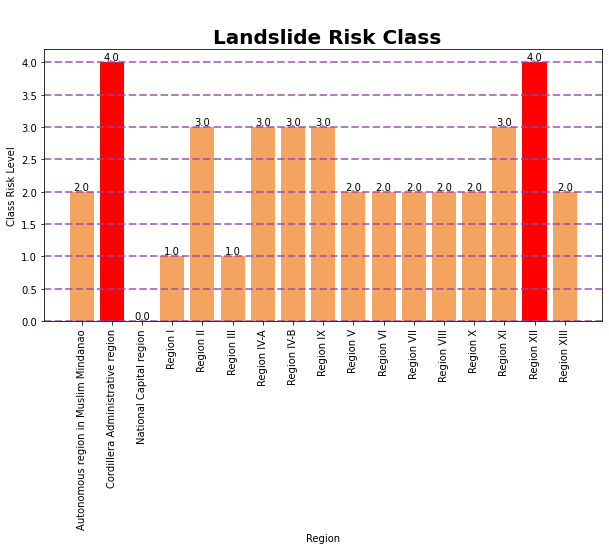

In [ ]:
#changing the size of the entire graph
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
n = gdf['adm1_name']
s=gdf['LS_Class']
#Creating plots
colors= ['#f4a460', 'red', '#f4a460', '#f4a460', '#f4a460', '#f4a460', 
         '#f4a460', '#f4a460', '#f4a460', '#f4a460', '#f4a460', '#f4a460', 
         '#f4a460', '#f4a460', '#f4a460', 'red', '#f4a460', ]
plt.title("\n Landslide Risk Class", fontweight="bold", fontsize=20)
plt.bar(n , s, color=colors)
gdf.columns = gdf.columns.str.replace('adm1_name', 'Region')
plt.grid(color='#9545ab', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation='90')

plt.ylabel('Class Risk Level')
plt.xlabel('Region')

for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom')
plt.savefig('ls.png')
plt.show()

**INTERPRETATION:**

The bar graph depicts the probability of a land slide in the Philippines. The y-axis in the diagram depicts the level of land slide, while the x-axis denotes the region. The blue grap depicts the danger level of land slip in the Philippines, as you can see. The crodillera administrative region and region XII have the greatest level of land slide in the Philippines, according to the graph. The Capital area, on the other hand, faces the least risk of land slip.

# **Data Cleaning of Deforestation Dataset**

*Source:*[ *Deforestation statistics for Philippines*](https://rainforests.mongabay.com/deforestation/2019/Philippines.htm)


*   This will provide the cleaned dataset for the recorded forest loss that occur within the Philippines from 2010-2018.


In [ ]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/Tree%20cover%20data%20for%20subnational%20administrative%20areas%20in%20Philippines.csv'
df2 = pan.read_csv(url, skipinitialspace=True)
#Dropping of columns that have irrelevant data
to_drop2 = ['Total','Tree cover','% cover','Loss', 
           '% loss','Avg loss/year','Loss 2001-2010','loss','Avg loss/year 2001-2010',
           'Loss 2011-2018','Avg loss/year 2011-2018',]
new_df2 = df2.drop(to_drop2, inplace=True, axis=1)
df2['Administrative area'].str.strip()
display(df2)

,Administrative area,Tree cover.1,Tree cover.2,loss.1
0,NaN,Extent,Extent,between
1,NaN,in 2010 (ha),in 2018 (ha),2011-2018
2,Abra,260337,258479,1%
3,Agusan del Norte,244975,234366,4%
4,Agusan del Sur,772606,707229,8%
...,...,...,...,...
80,Zamboanga Sibugay,180381,171121,5%
81,Zamboanga del Norte,448780,418404,7%
82,Zamboanga del Sur,315804,306193,3%
83,NaN,NaN,NaN,NaN


In [ ]:
#Filling Nan/Na Cell
df2 = df2.fillna(0)
df2.drop(df2.head(2).index,inplace=True)
df2.drop(df2.tail(2).index,inplace=True)
df2['loss.1'] = df2['loss.1'].str.replace(r'\D', '').astype(int)
df2['Tree cover.1'] = df2['Tree cover.1'].str.replace(r'\D', '').astype(int)
df2['Tree cover.2'] = df2['Tree cover.2'].str.replace(r'\D', '').astype(int)
display(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,Administrative area,Tree cover.1,Tree cover.2,loss.1
2,Abra,260337,258479,1
3,Agusan del Norte,244975,234366,4
4,Agusan del Sur,772606,707229,8
5,Aklan,115858,114432,1
6,Albay,174727,173006,1
...,...,...,...,...
78,Tawi-Tawi,100005,93363,7
79,Zambales,177982,175827,1
80,Zamboanga Sibugay,180381,171121,5
81,Zamboanga del Norte,448780,418404,7


In [ ]:
r1 = df2[(df2['Administrative area'].isin(['Ilocos Norte', 'Ilocos Sur', 'La Union', 'Pangasinan']))]
info = {'Region': ['Region I']}
region1 = pan.DataFrame(info)
region1['Tree cover.1'] = r1['Tree cover.1'].sum()
region1['Tree cover.2'] = r1['Tree cover.2'].sum()
region1['loss%'] = (((region1['Tree cover.1'] - region1['Tree cover.2']) / region1['Tree cover.1']) *100).round(0)        

r2 = df2[(df2['Administrative area'].isin(['Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya', 'Quirino']))]
info = {'Region': ['Region II']}
region2 = pan.DataFrame(info)
region2['Tree cover.1'] = r2['Tree cover.1'].sum()
region2['Tree cover.2'] = r2['Tree cover.2'].sum()
region2['loss%'] = (((region2['Tree cover.1'] - region2['Tree cover.2']) / region2['Tree cover.1']) *100).round(0)        

r3 = df2[(df2['Administrative area'].isin(['Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija', 'Pampanga', 'Tarlac', 'Zambales']))]
info = {'Region': ['Region III']}
region3 = pan.DataFrame(info)
region3['Tree cover.1'] = r3['Tree cover.1'].sum()
region3['Tree cover.2'] = r3['Tree cover.2'].sum()
region3['loss%'] = (((region3['Tree cover.1'] - region3['Tree cover.2']) / region3['Tree cover.1']) *100).round(0)        

r4a = df2[(df2['Administrative area'].isin(['Cavite', 'Laguna', 'Batangas', 'Rizal', 'Quezon']))]
info = {'Region': ['Region IV-A']}
region4a = pan.DataFrame(info)
region4a['Tree cover.1'] = r4a['Tree cover.1'].sum()
region4a['Tree cover.2'] = r4a['Tree cover.2'].sum()
region4a['loss%'] = (((region4a['Tree cover.1'] - region4a['Tree cover.2']) / region4a['Tree cover.1']) *100).round(0)        

r4b = df2[(df2['Administrative area'].isin(['Occidental Mindoro', 'Oriental Mindoro', 'Marinduque', 'Romblon', 'Palawan']))]
info = {'Region': ['Region IV-B']}
region4b = pan.DataFrame(info)
region4b['Tree cover.1'] = r4b['Tree cover.1'].sum()
region4b['Tree cover.2'] = r4b['Tree cover.2'].sum()
region4b['loss%'] = (((region4b['Tree cover.1'] - region4b['Tree cover.2']) / region4b['Tree cover.1']) *100).round(0)        

r5 = df2[(df2['Administrative area'].isin(['Albay', 'Camarines Norte', 'Camarines Sur', 'Sorsogon', 'Catanduanes', 'Masbate']))]
info = {'Region': ['Region V']}
region5 = pan.DataFrame(info)
region5['Tree cover.1'] = r5['Tree cover.1'].sum()
region5['Tree cover.2'] = r5['Tree cover.2'].sum()
region5['loss%'] = (((region5['Tree cover.1'] - region5['Tree cover.2']) / region5['Tree cover.1']) *100).round(0)        

r6 = df2[(df2['Administrative area'].isin(['Aklan', 'Antique', 'Negros Occidental', 'Capiz', 'Guimaras', 'Iloilo']))]
info = {'Region': ['Region VI']}
region6 = pan.DataFrame(info)
region6['Tree cover.1'] = r6['Tree cover.1'].sum()
region6['Tree cover.2'] = r6['Tree cover.2'].sum()
region6['loss%'] = (((region6['Tree cover.1'] - region6['Tree cover.2']) / region6['Tree cover.1']) *100).round(0)        

r7 = df2[(df2['Administrative area'].isin(['Bohol', 'Cebu', 'Negros Oriental', 'Siquijor']))]
info = {'Region': ['Region VII']}
region7 = pan.DataFrame(info)
region7['Tree cover.1'] = r7['Tree cover.1'].sum()
region7['Tree cover.2'] = r7['Tree cover.2'].sum()
region7['loss%'] = (((region7['Tree cover.1'] - region7['Tree cover.2']) / region7['Tree cover.1']) *100).round(0)        

r8 = df2[(df2['Administrative area'].isin(['Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar', 'Samar', 'Southern Leyte']))]
info = {'Region': ['Region VIII']}
region8 = pan.DataFrame(info)
region8['Tree cover.1'] = r8['Tree cover.1'].sum()
region8['Tree cover.2'] = r8['Tree cover.2'].sum()
region8['loss%'] = (((region8['Tree cover.1'] - region8['Tree cover.2']) / region8['Tree cover.1']) *100).round(0)        

r9 = df2[(df2['Administrative area'].isin(['Zamboanga Sibugay','Zamboanga del Norte','Zamboanga del Sur']))]
info = {'Region': ['Region IX']}
region9 = pan.DataFrame(info)
region9['Tree cover.1'] = r9['Tree cover.1'].sum()
region9['Tree cover.2'] = r9['Tree cover.2'].sum()
region9['loss%'] = (((region9['Tree cover.1'] - region9['Tree cover.2']) / region9['Tree cover.1']) *100).round(0)        

r10 = df2[(df2['Administrative area'].isin(['Bukidnon', 'Camiguin', 'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental']))]
info = {'Region': ['Region X']}
region10 = pan.DataFrame(info)
region10['Tree cover.1'] = r10['Tree cover.1'].sum()
region10['Tree cover.2'] = r10['Tree cover.2'].sum()
region10['loss%'] = (((region10['Tree cover.1'] - region10['Tree cover.2']) / region10['Tree cover.1']) *100).round(0)        

r11 = df2[(df2['Administrative area'].isin(['Davao del Sur', 'Davao del Norte', 'Davao Oriental', 'Davao Occidental', 'Compostela Valley']))]
info = {'Region': ['Region XI']}
region11 = pan.DataFrame(info)
region11['Tree cover.1'] = r11['Tree cover.1'].sum()
region11['Tree cover.2'] = r11['Tree cover.2'].sum()
region11['loss%'] = (((region11['Tree cover.1'] - region11['Tree cover.2']) / region11['Tree cover.1']) *100).round(0)        

r12 = df2[(df2['Administrative area'].isin(['Cotabato', 'Sarangani', 'South Cotabato', 'Sultan Kudarat']))]
info = {'Region': ['Region XII']}
region12 = pan.DataFrame(info)
region12['Tree cover.1'] = r12['Tree cover.1'].sum()
region12['Tree cover.2'] = r12['Tree cover.2'].sum()
region12['loss%'] = (((region12['Tree cover.1'] - region12['Tree cover.2']) / region12['Tree cover.1']) *100).round(0)        

r13 = df2[(df2['Administrative area'].isin(['Agusan del Norte', 'Agusan del Sur', 'Surigao del Norte', 'Surigao del Sur', 'Dinagat Islands']))]
info = {'Region': ['Region XIII']}
region13 = pan.DataFrame(info)
region13['Tree cover.1'] = r13['Tree cover.1'].sum()
region13['Tree cover.2'] = r13['Tree cover.2'].sum()
region13['loss%'] = (((region13['Tree cover.1'] - region13['Tree cover.2']) / region13['Tree cover.1']) *100).round(0)        

cr = df2[(df2['Administrative area'].isin(['Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga', 'Mountain Province']))]
info = {'Region': ['Cordillera Administrative region']}
car = pan.DataFrame(info)
car['Tree cover.1'] = cr['Tree cover.1'].sum()
car['Tree cover.2'] = cr['Tree cover.2'].sum()
car['loss%'] = (((car['Tree cover.1'] - car['Tree cover.2']) / car['Tree cover.1']) *100).round(0)        

nat = df2[(df2['Administrative area'].isin(['Metropolitan Manila']))]
info = {'Region': ['National Capital region']}
ncr = pan.DataFrame(info)
ncr['Tree cover.1'] = nat['Tree cover.1'].sum()
ncr['Tree cover.2'] = nat['Tree cover.2'].sum()
ncr['loss%'] = (((ncr['Tree cover.1'] - ncr['Tree cover.2']) / ncr['Tree cover.1']) *100).round(0)        

ar = df2[(df2['Administrative area'].isin(['Maguindanao', 'Lanao del Sur', 'Basilan', 'Sulu', 'Tawi-Tawi']))]
info = {'Region': ['Autonomous region in Muslim Mindanao']}
armm = pan.DataFrame(info)
armm['Tree cover.1'] = ar['Tree cover.1'].sum()
armm['Tree cover.2'] = ar['Tree cover.2'].sum()
armm['loss%'] = (((armm['Tree cover.1'] - armm['Tree cover.2']) / armm['Tree cover.1']) *100).round(0)        
defo = pan.concat([region1, region2, region3, region4a, region4b, region5, region6, region7, region8, region9, region10, region11, region12, region13, car, ncr, armm], ignore_index=True)
todrop = ['Tree cover.1','Tree cover.2',]
defo.drop(todrop, inplace=True, axis=1)
display(defo)

,Region,loss%
0,Region I,1.0
1,Region II,3.0
2,Region III,1.0
3,Region IV-A,2.0
4,Region IV-B,6.0
5,Region V,1.0
6,Region VI,2.0
7,Region VII,1.0
8,Region VIII,4.0
9,Region IX,5.0


# **Deforestation Dataset**

*Source:*[ *Deforestation statistics for Philippines*](https://rainforests.mongabay.com/deforestation/2019/Philippines.htm)


*   This will provide the cleaned dataset for the recorded forest loss that occur within the region of the Philippines from 2010-2018.


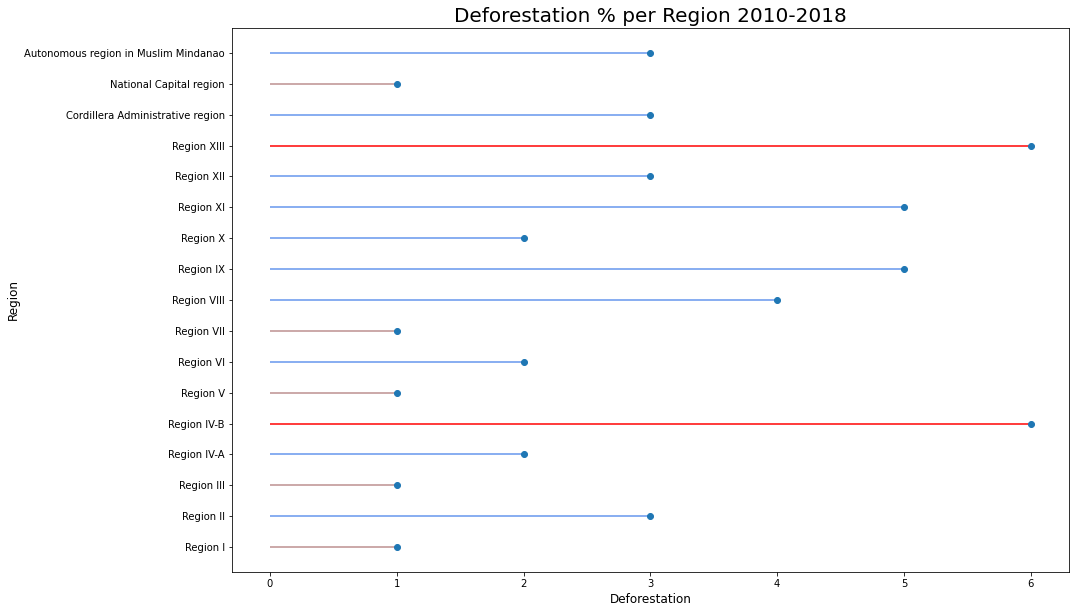

In [ ]:
#display(df3)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
x = defo['Region']
y = defo['loss%']
 
# The horizontal plot is made using the hline function
colors= ['#bc8f8f', '#6495ED', '#bc8f8f', '#6495ED', 'red', '#bc8f8f', 
         '#6495ED', '#bc8f8f', '#6495ED', '#6495ED', '#6495ED', '#6495ED', 
         '#6495ED', 'red', '#6495ED', '#bc8f8f', '#6495ED', ]
plt.hlines(y=x, xmin=0, xmax=y, color=colors)
plt.plot(y, x, "o")

# Add titles and axis names
plt.yticks(x,x)
plt.title("Deforestation % per Region 2010-2018", loc='center', fontsize=20)
plt.xlabel('Deforestation', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Show the plot
plt.savefig('deforestation.png')
plt.show()

**INTERPRETATION:**

The lolipop graph depicts the proportion of deforestation in each Philippine area from 2010 to 2018. The x-axis depicts the proportion of deforestation, while the y-axis represents the areas. The largest percentage of deforestation is seen in Regions XIII and IV-B, as shown in the graph. While deforestation is lowest in the National Capital Region, Region VII, Region V, Region III, and Region I. 

# **Elevation Dataset**
*Source:*[*Topogrophic-map*](https://en-nz.topographic-map.com/places/pki/Philippines/)
*  This provides the dataset for the recorded average elevation level in the Philippines (Regional Level).

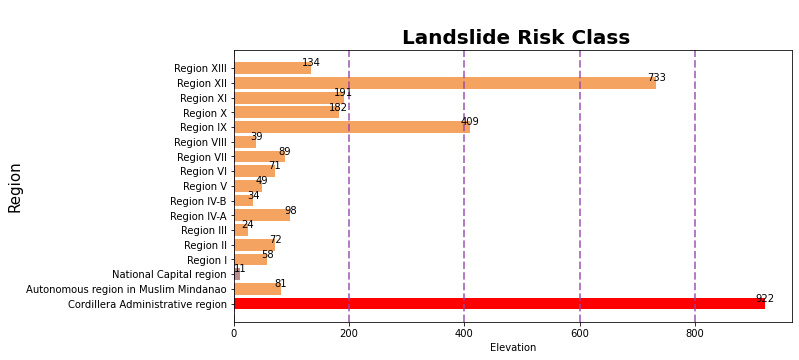

FileNotFoundError: ignored

In [ ]:
#Dataframe
url = 'https://raw.githubusercontent.com/AlexDiata/ITBA_3205_Eart-Benders/main/DATASET/Average%20Elevation%20Level%20-%20Philippines%20(Regional%20Level).csv'
df4 = pan.read_csv(url)
df4 = df4.replace({'Region' : { 'Cordillera Administrative region' : 'Cordillera Administrative region', 'Autonomous region in Muslim Mindanao' : 'Autonomous region in Muslim Mindanao', 'National Capital region' : 'National Capital region'}})
df4.Region = df4.Region.apply(str).str.strip()
x = df4['Region']
y = df4['elevation_m']

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)


colors= ['red', '#f4a460', '#bc8f8f', '#f4a460', '#f4a460', '#f4a460', 
         '#f4a460', '#f4a460', '#f4a460', '#f4a460', '#f4a460', '#f4a460', 
         '#f4a460', '#f4a460', '#f4a460', '#f4a460', '#f4a460', ]
plt.title("\n Landslide Risk Class", fontweight="bold", fontsize=20)
plt.barh(x, y, color=colors)
plt.ylabel("Region", fontsize=15)
plt.xlabel("Elevation", fontsize=10)
plt.grid(color='#9545ab', linestyle='--', linewidth=2, axis='x', alpha=0.7)

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(y[i],x[i]), ha='center', va='bottom')
plt.savefig('elevation.png')
plt.show()

**INTERPRETATION:**

The lollipop graph shows the Averag Elevation of each region. The Height of each Region is shown on the y-axis. The region is represented by the x-axis. The Cordillera administrative region had the greatest elevation, while the Region of National Capital had the lowest.

# **Linear Regression and Correlation Analysis**

### Preparation of Data for Analyisis

*   Preparation of data to be used in the correlation and covariance to measure the linear relationships among the variables.

In [ ]:
semi = gdf.merge(df4, on='Region', how='outer')
finaldf = semi.merge(defo, on='Region', how='outer')
dict = {'LS_Class': 'LandslideRiskClass', 'elevation_m': 'ElevationLevel', 'loss%': 'DeforestationRate'}
 
# call rename () method
finaldf.rename(columns=dict,
          inplace=True)

display(finaldf)

,Region,LandslideRiskClass,ElevationLevel,DeforestationRate
0,Autonomous region in Muslim Mindanao,2.0,81,3.0
1,Cordillera Administrative region,4.0,922,3.0
2,National Capital region,0.0,11,1.0
3,Region I,1.0,58,1.0
4,Region II,3.0,72,3.0
5,Region III,1.0,24,1.0
6,Region IV-A,3.0,98,2.0
7,Region IV-B,3.0,34,6.0
8,Region IX,3.0,409,5.0
9,Region V,2.0,49,1.0


In [ ]:
finaldf.describe()

,LandslideRiskClass,ElevationLevel,DeforestationRate
count,17.000000,17.000000,17.000000
mean,2.294118,188.058824,2.882353
std,1.046704,260.341235,1.763603
min,0.000000,11.000000,1.000000
25%,2.000000,49.000000,1.000000
50%,2.000000,81.000000,3.000000
75%,3.000000,182.000000,4.000000
max,4.000000,922.000000,6.000000


In [ ]:
final = finaldf.groupby("LandslideRiskClass")
final.mean().reset_index()

,LandslideRiskClass,ElevationLevel,DeforestationRate
0,0.0,11.000000,1.000000
1,1.0,41.000000,1.000000
2,2.0,92.142857,2.714286
3,3.0,160.800000,4.200000
4,4.0,827.500000,3.000000


In [ ]:
#Correlations
pan.DataFrame(abs(finaldf.corr()['LandslideRiskClass']).sort_values(ascending = False))

,LandslideRiskClass
LandslideRiskClass,1.000000
ElevationLevel,0.704061
DeforestationRate,0.493922


In [ ]:
## get the most important variables. 
corr = finaldf.corr()**2
pan.DataFrame(corr.LandslideRiskClass.sort_values(ascending=False))

,LandslideRiskClass
LandslideRiskClass,1.000000
ElevationLevel,0.495702
DeforestationRate,0.243959


# Correlation Matrix for Relationship Identification with Landslide Risk
### Correlation and Heatmap Matrix

*   <p align=justify>The following are used to help the analysts estimate how a dependent variable changes as the other independent variables also change. For the following data, our dependent variable is the Landslide Risk because it is what we will anticipate for this analysis, while the independent variables are deforestation rate, average elevation level rate, and precipitation level.

* <p align=justify> Correlation Matrix is used to demonstrate and present the correlation coefficients of the mentioned variables above. This depicts the correlation between all the possible pairs of values in the dataframe we have provided earlier for the analysis.

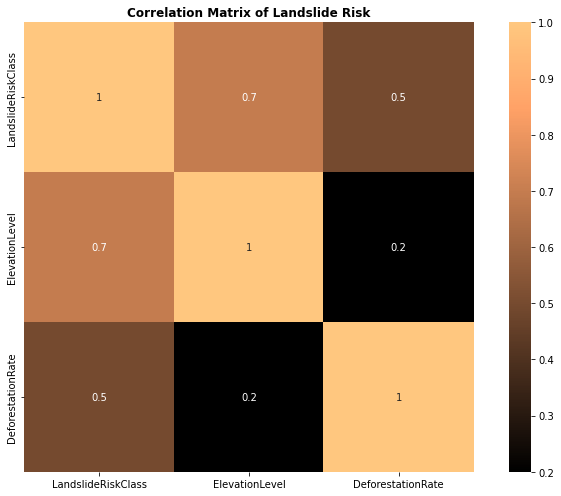

In [ ]:
#changing the size of the entire graph
f = plt.figure(tight_layout=True)
f.set_figwidth(10)
f.set_figheight(7)

#Correlation and Heatmap Matrix
corMatrix = finaldf.corr().round(1)
sb.heatmap(corMatrix, annot=True, cmap="copper", square=True)
plt.title("Correlation Matrix of Landslide Risk", fontweight= "bold")
plt.savefig('matrix.png')
plt.show()

POSITIVE CORRELATION:

* Landslide to Elevation: 0.7
* Landslide to Deforestation: 0.5
* Elevation to Landslide: 0.7
* Elevation to Deforestation: 0.2
* Deforestation to Landslide: 0.5
* Deforestation to Elevation: 0.2

### Landslide Risk Class X Elevation Level

Text(0.5, 1.0, '\n Relationship between Landslide Risk Class and Elevation Level')

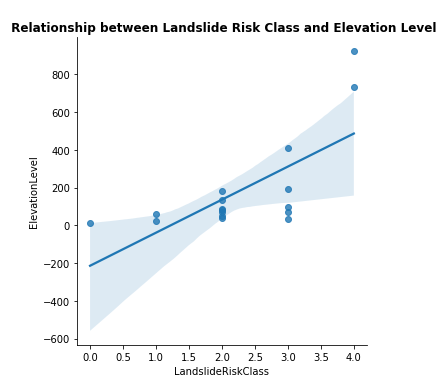

In [ ]:
#Linear Regression
sb.lmplot(x="LandslideRiskClass", y="ElevationLevel", data=finaldf)
plt.title("\n Relationship between Landslide Risk Class and Elevation Level", fontweight="bold")
plt.savefig('lsel.png')

**Interpretation: ** 

The scatter plot illustrates the relationship between Elavation Level and Landslide Risk Class. Positive Correlation between Landslide Risk Class and Elevation Level Rate Coefficient: 0.7 was found. Because the calculated correlation coefficient is between 0.70 to 0.90, this indicates that these two variables have a strong relationship. This indicates that when the elevation is high, the chances of a landslide are equally high.



### Landslide Risk Class X Deforestation Rate

Text(0.5, 1.0, '\n Relationship between Landslide Risk Class and Deforestation Rate')

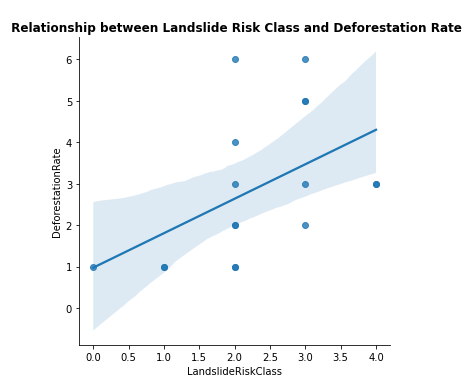

In [ ]:
#Linear Regression
sb.lmplot(x="LandslideRiskClass", y="DeforestationRate", data=finaldf)
plt.title("\n Relationship between Landslide Risk Class and Deforestation Rate", fontweight="bold")
plt.savefig('lsdef.png')

**Interpretation: **

Landslide Risk Class and Deforestation Rate Coefficient Correlation: 0.5. As shown in the visualization, there is a moderate relationship between these two factors. This suggests that deforestation is a major contributor to landslides.